In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from backtester import Backtester

In [2]:
col_names = ['Date', 'Time', 'Open','High','Low','Close','Volume']
data = pd.read_csv('EURGBPD1.csv', names = col_names)
data.index = data.Date
data.drop('Time',axis = 1, inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
1994.01.03,1994.01.03,0.7612,0.7617,0.7595,0.7601,331
1994.01.04,1994.01.04,0.7596,0.7606,0.7575,0.7581,471
1994.01.05,1994.01.05,0.7582,0.7595,0.7549,0.7558,681
1994.01.06,1994.01.06,0.7559,0.7575,0.7544,0.7567,541
1994.01.07,1994.01.07,0.7576,0.7595,0.7563,0.7592,481


In [3]:
data["SMA20"] = data["Close"].rolling(20).mean()
data["SMA50"] = data["Close"].rolling(50).mean()
data["signal"] = 0
data.loc[data["SMA20"] > data["SMA50"], "signal"] = 1
data.loc[data["SMA20"] < data["SMA50"], "signal"] = -1

In [5]:
bt = Backtester(data, signal_col="signal", price_col="Close")
results = bt.run_backtest(initial_capital=100_000)

In [9]:
metrics = bt.evaluate()
print(metrics)

{'Total Return': -0.35211127576512424, 'Annualized Return': -0.012715604418516824, 'Volatility': 0.0048681777080931115, 'Annualized Volatility': 0.07727992532209658, 'Max Drawdown': -0.6100970277019935, 'Calmar Ratio': -0.020841937988801115, 'Sharpe Ratio': -0.12692454611800852, 'Sortino Ratio': -0.1789078800579158, 'Number of Trades': 204, 'Win Rate (%)': 29.411764705882355, 'Average Win': 2936.0707062883657, 'Average Loss': -1466.1174281750023, 'Profit Factor': 0.8344234716653222, 'Payoff Ratio': 2.0026163319967734, 'Expectancy': -171.35621215636456}


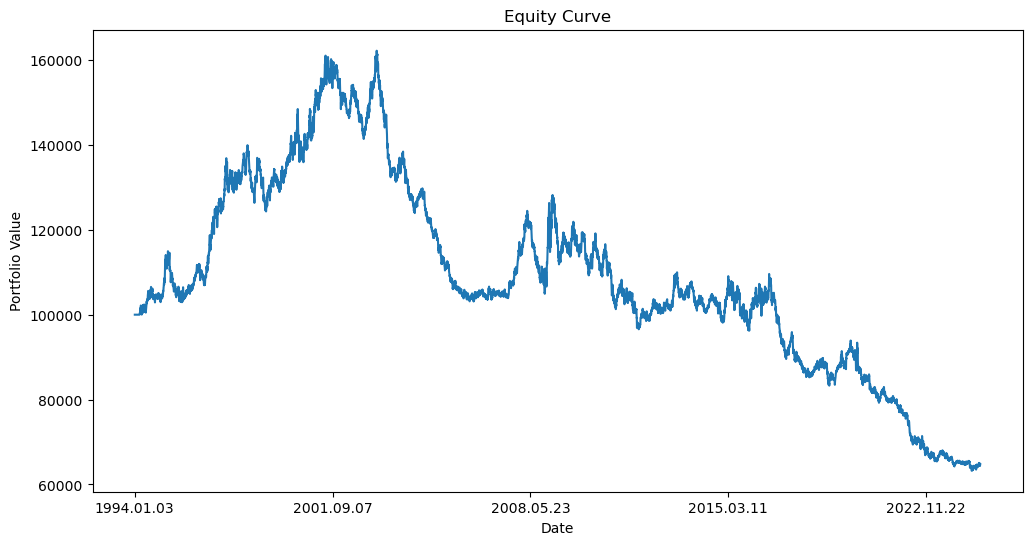

In [11]:
results["equity_curve"].plot(title="Equity Curve", figsize=(12,6))
plt.ylabel("Portfolio Value")
plt.show()